In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


In [2]:
X,y = make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y = y.reshape((y.shape[0], 1))


In [3]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


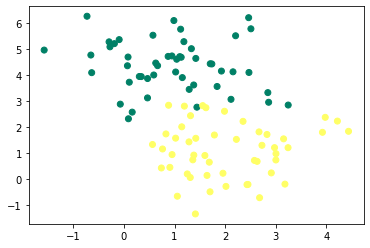

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = "summer")
plt.show()

In [5]:
#Initialisation
def init(X):
    W = np.random.randn(X.shape[1],1)
    b = np.random.randn(1)
    return (W,b)

In [6]:
#Le model
"""
def model(X,W,b):
    Z = X.dot(W)+b
    A = 1/(1 + np.exp(-Z))
    return A
"""

def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [7]:
#Fonction cout
def cout(A,y):
    #return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))


In [8]:
#Descent Gradient
def desc_grad(X,A,y):
    dw = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dw,db)

In [9]:
#Mis a jjour les poids
def update(W,b,dw,db,learning_rate):
    W = W - learning_rate * dw
    b = b - learning_rate * db
    return (W,b)

In [10]:
# Construisons le Reseaux de neurones
def fonc_neurone(X,y,learning_rate = 0.1,epoche = 100):
    #Initialisation des poids W et biais b
    w,b = init(X)
    
    loss = []
    # on fait l'entrainement du model
    for i in range(epoche):
        A = model(X,w,b)
        loss.append(cout(A,y))
        dw,db = desc_grad(X,A,y)
        w,b = update(w,b,dw,db,learning_rate)
    plt.plot(loss)
    plt.show

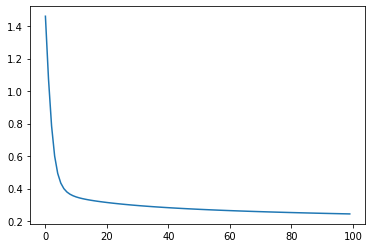

In [11]:
fonc_neurone(X,y)